PRAVEENA ANAND [CH.SC.U4CSE23044]

**LOGISTIC REGRESSION:**

**Diabetes Dataset:**

Importing Required Libraries:

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

Importing (Reading) Datasets:

In [45]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv('/content/diabetes.csv', header = None, names=col_names)
print(data.shape)
data.head()

(769, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


Checking for Any Null Values in the Dataset:

In [46]:
data.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


Convert All Columns to Numeric (Forcing Errors to NaN):

In [47]:
data = data.apply(pd.to_numeric, errors='coerce')

Handle Missing Values (Filling with the Mean of the Column):

In [48]:
data.fillna(data.mean(), inplace=True)

Convert the Label Column to Binary (0 and 1):

In [49]:
data['label'] = data['label'].astype(int)

Assigning Dependent and Independent Variables:

In [50]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
x = data[feature_cols]
y=data.label

Splitting the Dataset into Training and Testing Dataset:

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=5)
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(615, 7)

(615,)

(154, 7)

(154,)

Fitting the Model (Logistic Regression):

In [52]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)

In [53]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

Evaluation Metrics:

In [54]:
conf_mat=metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix', conf_mat)
Accuracy_score=metrics.accuracy_score (y_test,y_pred)
print('Accuracy Score', Accuracy_score)
print('Accuracy in Percentage', int (Accuracy_score*100), '%')

Confusion Matrix [[89 13]
 [19 33]]
Accuracy Score 0.7922077922077922
Accuracy in Percentage 79 %


Displaying the Confusion Matrix in a Tabular Form:

<Axes: xlabel='Predicted', ylabel='Actual'>

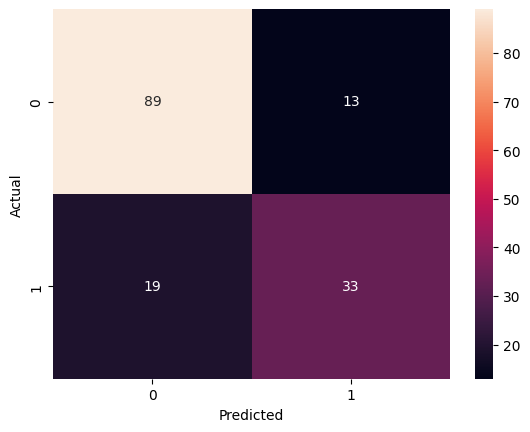

In [55]:
conf_mat=pd.crosstab (y_test, y_pred, rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(conf_mat, annot=True)